# Análise Exploratória - Dados de Reclamações/Solicitações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Inicialize um DataFrame a partir do arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` disponibilizado pelo professor.

Responda: Qual a média das idades das pessoas que registraram chamadas? Qual a idade máxima? Quantos valores únicos possuímos para a coluna `BAIRRO_ASS`?

**Dica:** A função len() pode ser usada para se obter o tamanho de listas, séries ou dataframes. Por exemplo, `len([1,3,9])` retorna 3.

In [2]:
# Resposta:
import pandas as pd
df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')
print(f"Dimensões: {df.shape}")
print(f"Colunas: {list(df.columns)}")

Dimensões: (6866, 9)
Colunas: ['DATA', 'HORARIO', 'ASSUNTO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL', 'HORA', 'IDADE']


In [3]:
print("\n--- Estatísticas de idade e bairros ---")
print(f"Média das idades: {df['IDADE'].mean():.2f}")
print(f"Idade máxima: {df['IDADE'].max()}")
print(f"Valores únicos em BAIRRO_ASS: {df['BAIRRO_ASS'].nunique()}")


--- Estatísticas de idade e bairros ---
Média das idades: 48.17
Idade máxima: 96
Valores únicos em BAIRRO_ASS: 75


O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [4]:
# Resposta:
display(df.head())

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
0,2016-09-12,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19
1,2016-12-11,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45
2,2017-11-01,12:11:12,CRM-AF/SMS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60
3,2016-12-14,10:19:29,CRM-AF/SMS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78
4,2016-06-12,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36


In [5]:
display(df.describe())

,HORA,IDADE
count,6866.000000,6866.000000
mean,13.523886,48.171570
std,4.365003,14.231311
min,0.000000,15.000000
25%,10.000000,37.000000
50%,13.000000,48.000000
75%,17.000000,58.000000
max,23.000000,96.000000


## Visualização da distribuição das variáveis

Exiba histogramas para visualizar a distribuição de idades para homens e mulheres.

Responda: Existe alguma diferença na distribuição das idades entre homens e mulheres?

In [6]:
# Resposta:
print("\n--- Distribuição de idades por sexo ---")
print(df['SEXO'].value_counts())



--- Distribuição de idades por sexo ---
SEXO
F    3548
M    3318
Name: count, dtype: int64


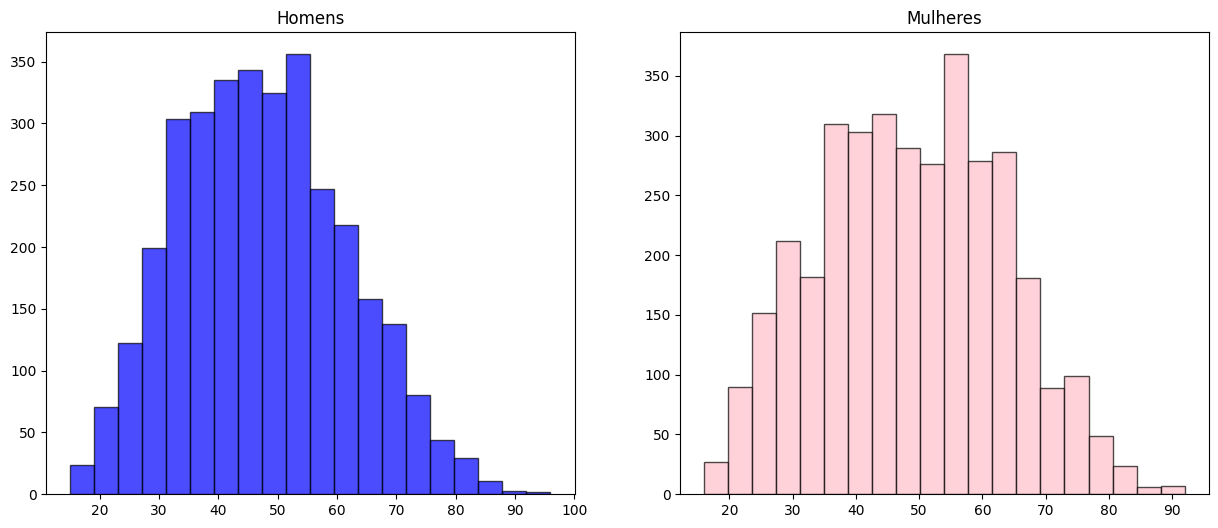

In [7]:
# Resposta:
## Histogramas
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
df_m = df[df['SEXO'] == 'M']
df_f = df[df['SEXO'] == 'F']
ax1.hist(df_m['IDADE'], bins=20, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Homens')
ax2.hist(df_f['IDADE'], bins=20, alpha=0.7, color='pink', edgecolor='black')
ax2.set_title('Mulheres')
plt.show()



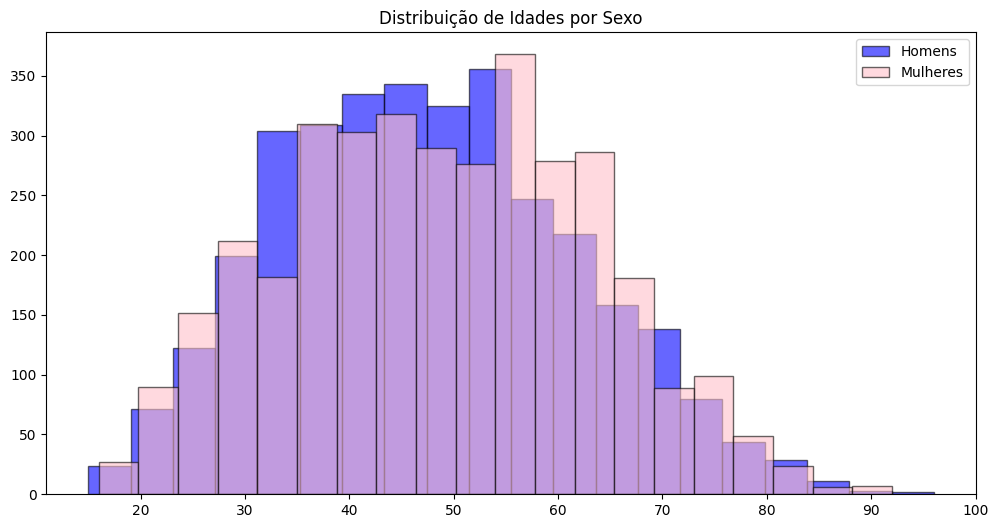

In [8]:
# Histograma sobreposto
plt.figure(figsize=(12, 6))
plt.hist(df_m['IDADE'], bins=20, alpha=0.6, color='blue', label='Homens', edgecolor='black')
plt.hist(df_f['IDADE'], bins=20, alpha=0.6, color='pink', label='Mulheres', edgecolor='black')
plt.legend()
plt.title('Distribuição de Idades por Sexo')
plt.show()

#Resposta:
Sim, há diferença na distribuição das idades. Homens se concentram mais na faixa dos 50 anos, com distribuição levemente assimétrica. 
Já as mulheres têm uma distribuição mais simétrica, com pico por volta dos 55 anos e maior presença em idades mais avançadas.

Exiba um BoxPlot das idades de acordo com o sexo do registrante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

<Figure size 1000x600 with 0 Axes>

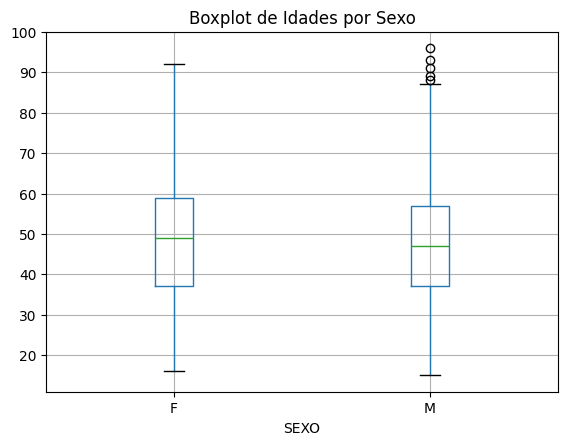

In [9]:
# Resposta:
plt.figure(figsize=(10, 6))
df.boxplot(column='IDADE', by='SEXO')
plt.title('Boxplot de Idades por Sexo')
plt.suptitle('')
plt.show()


## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de registros (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 registros. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [10]:
# Resposta:
print("\n--- Seleção dos assuntos mais comuns ---")
assuntos_grouped = df.groupby('ASSUNTO').size().reset_index(name='count')
assuntos_grouped = assuntos_grouped.sort_values('count', ascending=False)
print("Top 20 assuntos mais comuns:")
print(assuntos_grouped.head(20))


--- Seleção dos assuntos mais comuns ---
Top 20 assuntos mais comuns:
                                            ASSUNTO  count
23                                           COLETA   1632
57                               ILUMINAÇÃO PÚBLICA    992
132                                        TRÂNSITO    867
0                  ABORDAGEM SOCIAL DE RUA - ADULTO    321
103                                  POSTO DE SAÚDE    309
80               MOTORISTAS, COBRADORES E PORTEIROS    234
30                             DISQUE SOLIDARIEDADE    191
98                                         POLUIÇÃO    135
86                               OUTROS SETORES SMS    128
52   FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS    124
3                                           ANIMAIS    116
4                                ANIMAIS DOMÉSTICOS    107
123                                        SEMÁFORO     99
143                                          ÁRVORE     93
43                               FAUNA SINAN

In [11]:
# Resposta:
# Criando lista com assuntos que têm mais de 60 registros
assuntos_top = assuntos_grouped[assuntos_grouped['count'] > 60]['ASSUNTO'].tolist()
print(f"\nAssuntos com mais de 60 registros: {len(assuntos_top)}")
print("Lista dos assuntos:")
for i, assunto in enumerate(assuntos_top, 1):
    print(f"{i}. {assunto}")


Assuntos com mais de 60 registros: 18
Lista dos assuntos:
1. COLETA
2. ILUMINAÇÃO PÚBLICA
3. TRÂNSITO
4. ABORDAGEM SOCIAL DE RUA - ADULTO
5. POSTO DE SAÚDE
6. MOTORISTAS, COBRADORES E PORTEIROS
7. DISQUE SOLIDARIEDADE
8. POLUIÇÃO
9. OUTROS SETORES SMS
10. FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS
11. ANIMAIS
12. ANIMAIS DOMÉSTICOS
13. SEMÁFORO
14. ÁRVORE
15. FAUNA SINANTRÓPICA
16. DRENAGEM
17. UNIDADE DE PRONTO ATENDIMENTO
18. LIMPEZA


Crie um novo DataFrame contendo apenas registros contidos na lista das registros mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [12]:
# Resposta:
df_filtered = df[df['ASSUNTO'].isin(assuntos_top)]
print(f"\nDataFrame filtrado: {df_filtered.shape}")




DataFrame filtrado: (5655, 9)


## Análise de similaridades entre registros de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [13]:
# Resposta:
crosstab_data = pd.crosstab(df_filtered['ASSUNTO'], df_filtered['BAIRRO_ASS'])
print("Dimensões da tabela cruzada:")
print(f"Linhas (assuntos): {crosstab_data.shape[0]}")
print(f"Colunas (bairros): {crosstab_data.shape[1]}")
print("\nPrimeiras 10 linhas e 10 colunas da tabela cruzada:")
print(crosstab_data.iloc[:10, :10])

Dimensões da tabela cruzada:
Linhas (assuntos): 18
Colunas (bairros): 75

Primeiras 10 linhas e 10 colunas da tabela cruzada:
BAIRRO_ASS                                      abranches  agua verde  ahu  \
ASSUNTO                                                                      
ABORDAGEM SOCIAL DE RUA - ADULTO                        2           8    4   
ANIMAIS                                                 0           0    1   
ANIMAIS DOMÉSTICOS                                      1           1    0   
COLETA                                                 15          41   17   
DISQUE SOLIDARIEDADE                                    1           4    2   
DRENAGEM                                                0           1    0   
FAUNA SINANTRÓPICA                                      1           2    0   
FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS          1          13    1   
ILUMINAÇÃO PÚBLICA                                     12          22    9   
LIMPEZA         

Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [14]:
# Resposta:
correlation_matrix = crosstab_data.corr()
print(f"\nDimensões da matriz de correlação: {correlation_matrix.shape}")
print(f"Correlação máxima: {correlation_matrix.max().max():.3f}")
print(f"Correlação mínima: {correlation_matrix.min().min():.3f}")
print(f"Média das correlações: {correlation_matrix.mean().mean():.3f}")


Dimensões da matriz de correlação: (75, 75)
Correlação máxima: 1.000
Correlação mínima: -0.174
Média das correlações: 0.609


Use um Heatmap para exibir as correlações com cores.

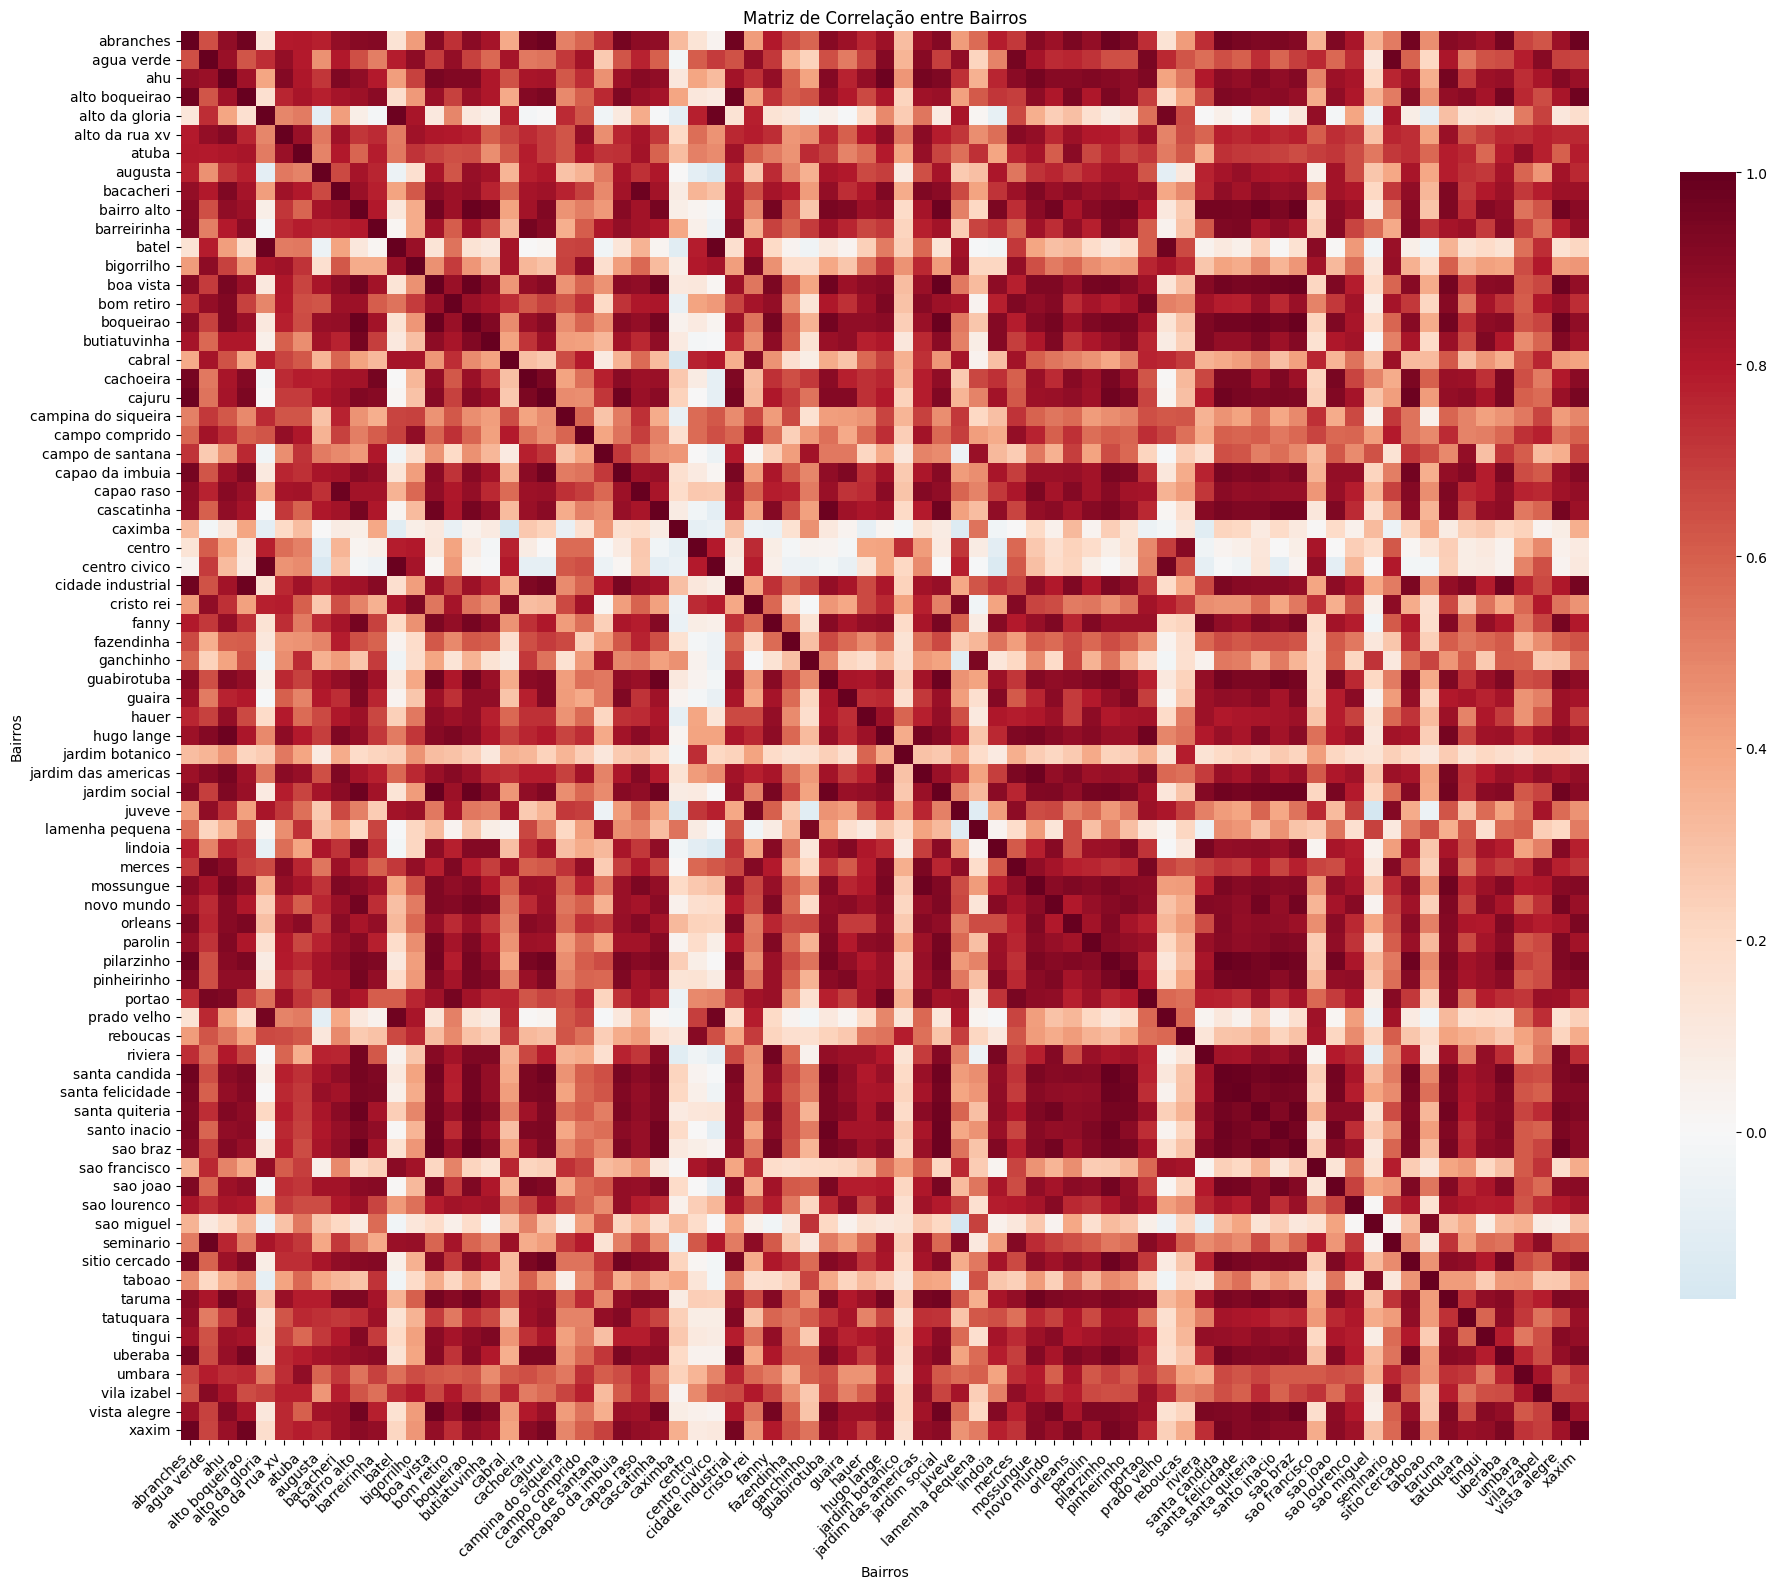

In [15]:
# Resposta:
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='RdBu_r', center=0, annot=False, square=True, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação entre Bairros')
plt.xlabel('Bairros')
plt.ylabel('Bairros')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?
#### Resposta
Sim, é possível perceber padrões. Há grupos de bairros com alta correlação entre si, sugerindo características semelhantes. 
Também há bairros com correlação baixa com a maioria, indicando perfis mais distintos.

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais registros.

- Crie um DataFrame com a contagem de registros por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais registros

In [16]:
# Resposta:
bairros_grouped = df.groupby('BAIRRO_ASS').size().reset_index(name='TOTAL_REGISTROS')
bairros_grouped = bairros_grouped.sort_values('TOTAL_REGISTROS', ascending=False)
print("Top 20 bairros com mais registros:")
print(bairros_grouped.head(20))

Top 20 bairros com mais registros:
           BAIRRO_ASS  TOTAL_REGISTROS
29  cidade industrial              406
27             centro              404
19             cajuru              310
65      sitio cercado              252
15          boqueirao              243
1          agua verde              201
9         bairro alto              196
51             portao              195
70            uberaba              194
74              xaxim              192
46         novo mundo              189
50        pinheirinho              159
3      alto boqueirao              153
56   santa felicidade              150
24         capao raso              143
13          boa vista              142
53           reboucas              141
8           bacacheri              139
55      santa candida              127
68          tatuquara              120


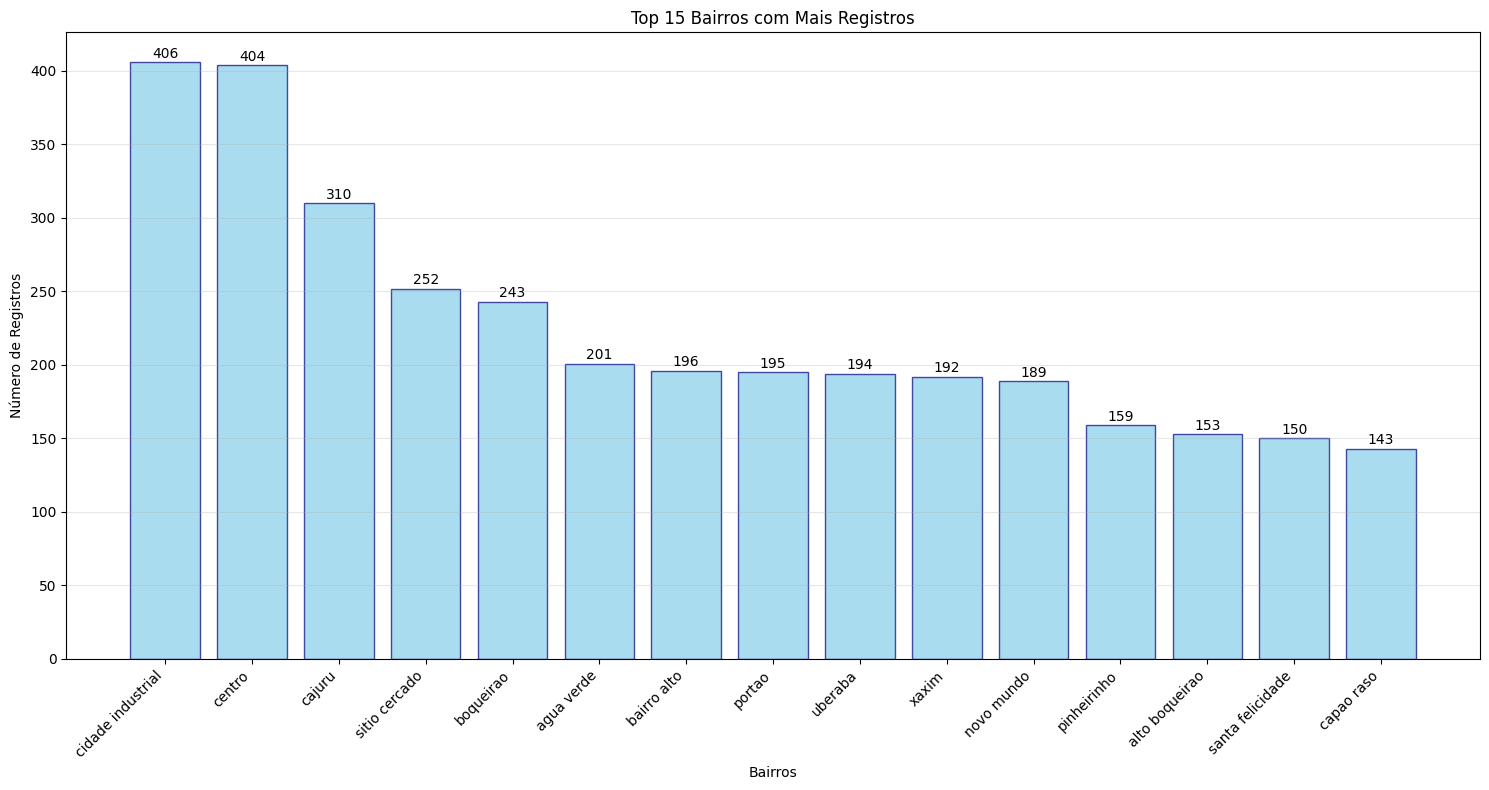

In [17]:
# Resposta:
plt.figure(figsize=(15, 8))
top_15_bairros = bairros_grouped.head(15)
bars = plt.bar(range(len(top_15_bairros)), top_15_bairros['TOTAL_REGISTROS'], 
               color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Top 15 Bairros com Mais Registros')
plt.xlabel('Bairros')
plt.ylabel('Número de Registros')
plt.xticks(range(len(top_15_bairros)), top_15_bairros['BAIRRO_ASS'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Adicionando valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

O problema de considerar apenas o total de registros é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de registros, ou seja, o número de registros por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [18]:
# Resposta:
df_populacao = pd.read_csv('../data/dados_bairros.csv')
print("Dados de população dos bairros:")
print(df_populacao.head())
print(f"Dimensões: {df_populacao.shape}")

# Convertendo nomes dos bairros para caixa-baixo (minúsculo)
df_populacao['BAIRRO_LOWER'] = df_populacao['Bairro'].str.lower()
bairros_grouped['BAIRRO_LOWER'] = bairros_grouped['BAIRRO_ASS'].str.lower()

print("\nExemplos de conversão para minúsculo:")
print("Dados de população:")
print(df_populacao[['BAIRRO_LOWER']].head())
print("\nDados de registros:")
print(bairros_grouped[['BAIRRO_ASS', 'BAIRRO_LOWER']].head())

# Fazendo junção usando merge com left_on e right_on
df_merged = bairros_grouped.merge(df_populacao, 
                                 left_on='BAIRRO_LOWER', 
                                 right_on='BAIRRO_LOWER', 
                                 how='left')
print(f"\nResultado da junção: {df_merged.shape}")

# Verificando bairros que não foram encontrados
bairros_nao_encontrados = df_merged[df_merged['Total'].isna()]
print(f"\nBairros sem dados de população: {len(bairros_nao_encontrados)}")
if len(bairros_nao_encontrados) > 0:
    print("Bairros:")
    for bairro in bairros_nao_encontrados['BAIRRO_ASS']:
        print(f"  - {bairro}")

Dados de população dos bairros:
            Bairro AreaKm2  Homens  Mulheres  Total  Domicilios RendimentoDom
0    Alto Boqueiao   12,11   24824     26331  51155       14301       1110,63
1  Lamenha Pequena     3,4     353       348    701         188        665,99
2            Xaxim    8,92   26747     27944  54691       15482        1211,6
3          Riviera    2,36     100       103    203          62        423,13
4       Sao Miguel       7    2512      2399   4911        1247        409,43
Dimensões: (75, 7)

Exemplos de conversão para minúsculo:
Dados de população:
      BAIRRO_LOWER
0    alto boqueiao
1  lamenha pequena
2            xaxim
3          riviera
4       sao miguel

Dados de registros:
           BAIRRO_ASS       BAIRRO_LOWER
29  cidade industrial  cidade industrial
27             centro             centro
19             cajuru             cajuru
65      sitio cercado      sitio cercado
15          boqueirao          boqueirao

Resultado da junção: (75, 10)

Bairros s

Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de registros pela coluna de total de habitantes.

In [19]:
# Resposta:
df_merged['TAXA'] = df_merged['TOTAL_REGISTROS'] / df_merged['Total']
df_merged_sorted = df_merged.sort_values('TAXA', ascending=False)
print("\nTop 10 bairros com maior taxa de registros:")
print(df_merged_sorted[['BAIRRO_ASS', 'TOTAL_REGISTROS', 'Total', 'TAXA']].head(10))



Top 10 bairros com maior taxa de registros:
             BAIRRO_ASS  TOTAL_REGISTROS    Total      TAXA
27       alto da gloria               87   5588.0  0.015569
25        sao francisco               95   6435.0  0.014763
31      jardim botanico               79   6153.0  0.012839
1                centro              404  32623.0  0.012384
46        centro civico               50   4767.0  0.010489
34               taruma               73   7045.0  0.010362
32            seminario               76   7395.0  0.010277
35     campo de santana               72   7335.0  0.009816
16             reboucas              141  15618.0  0.009028
41  campina do siqueira               58   7108.0  0.008160


Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de registros.

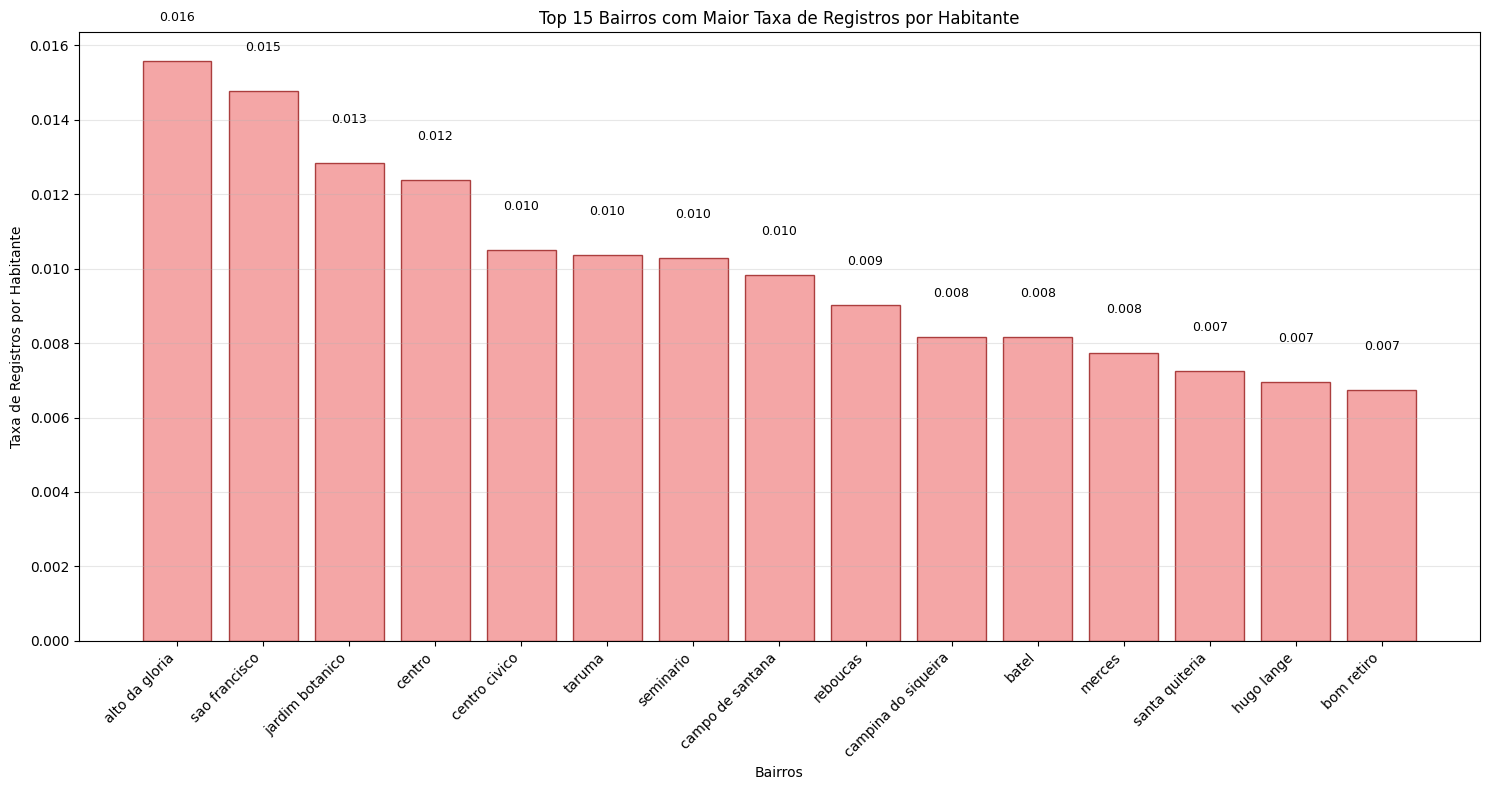

In [20]:
# Resposta:
plt.figure(figsize=(15, 8))
top_15_taxa = df_merged_sorted.head(15)
bars = plt.bar(range(len(top_15_taxa)), top_15_taxa['TAXA'], 
               color='lightcoral', edgecolor='darkred', alpha=0.7)
plt.title('Top 15 Bairros com Maior Taxa de Registros por Habitante')
plt.xlabel('Bairros')
plt.ylabel('Taxa de Registros por Habitante')
plt.xticks(range(len(top_15_taxa)), top_15_taxa['BAIRRO_ASS'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Adicionando valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Analisando tendências temporais

Vamos agora identificar os meses com mais registros. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando os registros por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [21]:
# Resposta:
df['DATA'] = pd.to_datetime(df['DATA'])
print(f"Tipo da coluna DATA: {df['DATA'].dtype}")
print(f"Data mínima: {df['DATA'].min()}")
print(f"Data máxima: {df['DATA'].max()}")

Tipo da coluna DATA: datetime64[ns]
Data mínima: 2016-01-11 00:00:00
Data máxima: 2017-12-01 00:00:00


In [22]:
# Resposta:
df['MES_ANO'] = df['DATA'].dt.to_period('M')
registros_por_mes = df.groupby('MES_ANO').size().reset_index(name='TOTAL_REGISTROS')
registros_por_mes['MES_ANO'] = registros_por_mes['MES_ANO'].astype(str)
print("\nRegistros por mês:")
print(registros_por_mes)
print(f"\nTotal de meses: {len(registros_por_mes)}")
print(f"Média de registros por mês: {registros_por_mes['TOTAL_REGISTROS'].mean():.1f}")



Registros por mês:
    MES_ANO  TOTAL_REGISTROS
0   2016-01              216
1   2016-02              145
2   2016-03              182
3   2016-04              138
4   2016-05              231
5   2016-06              178
6   2016-07              279
7   2016-08              265
8   2016-09              233
9   2016-10              190
10  2016-11             1909
11  2016-12             1114
12  2017-01              855
13  2017-02               58
14  2017-03               62
15  2017-04              104
16  2017-05              108
17  2017-06               84
18  2017-07               59
19  2017-08               18
20  2017-09               95
21  2017-10              122
22  2017-11              100
23  2017-12              121

Total de meses: 24
Média de registros por mês: 286.1


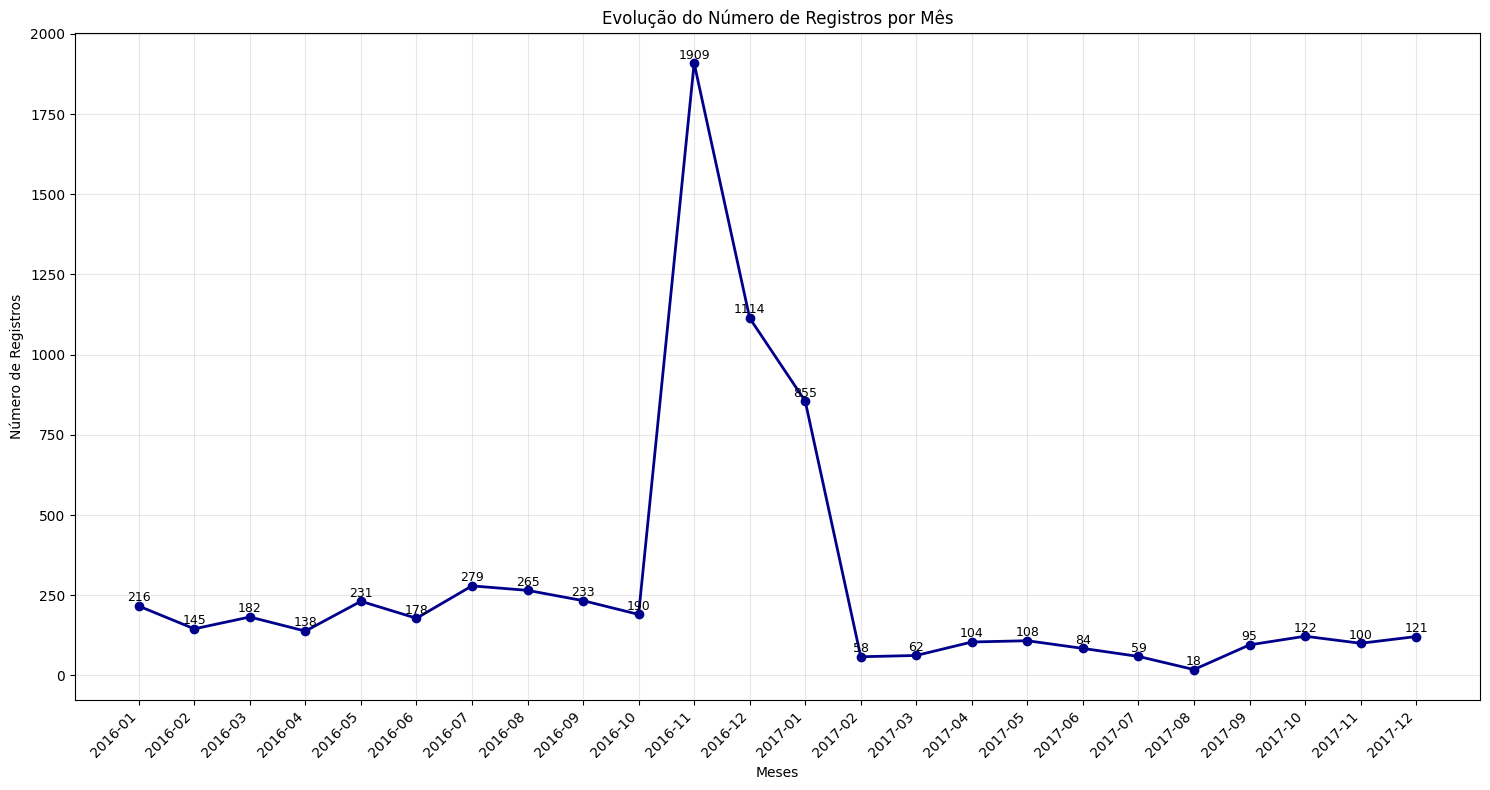

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(registros_por_mes)), registros_por_mes['TOTAL_REGISTROS'], 
         marker='o', linewidth=2, markersize=6, color='darkblue')
plt.title('Evolução do Número de Registros por Mês')
plt.xlabel('Meses')
plt.ylabel('Número de Registros')
plt.grid(True, alpha=0.3)
plt.xticks(range(len(registros_por_mes)), registros_por_mes['MES_ANO'], rotation=45, ha='right')

# Adicionando valores nos pontos
for i, valor in enumerate(registros_por_mes['TOTAL_REGISTROS']):
    plt.text(i, valor + 5, str(valor), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show() 